In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getDf(data_structure):
    files = {}
    for size in range(1, 5):
        with open("result{}_{}.txt".format(data_structure, size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]
        
    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        for col in ["size", 'inittime', 'addtime', 'totaltime']:
            df[col] = df[col].map(lambda x: int(x))
        df['initialization'] = df['initialization'].map(lambda x: True if x == "true" else False)
        dfs[k] = df
    df = dfs['size1']
    for s in range(2, 5):
        df = pd.concat([df, dfs["size{}".format(s)]])
    return df

In [3]:
df_base = pd.DataFrame(columns=["datastructure", "initialization", "size", "inittime", "addtime", "totaltime", "element"])
for data_structure in ["JavaAlloc", "RustAlloc"]:
    for element in ["", "CharArr", "String", "Object"]:
        df = getDf("{}{}".format(data_structure, element))
        if data_structure == "JavaAlloc":
            df["datastructure"] = "JavaArrayList"
        elif data_structure == "RustAlloc":
            df["datastructure"] = "RustVector"
        if element == "":
            df["element"] = "Integer"
        else:
            df["element"] = element           
        df_base = pd.concat([df_base, df])

In [4]:
df_base.head()

,datastructure,initialization,size,inittime,addtime,totaltime,element
1,JavaArrayList,True,10,34712,12550,47515,Integer
2,JavaArrayList,False,10,31525,26759,58575,Integer
3,JavaArrayList,True,10,36047,18483,54861,Integer
4,JavaArrayList,False,10,34540,25431,60291,Integer
5,JavaArrayList,True,10,34951,16088,51334,Integer


In [5]:
df_base = df_base.astype({"initialization": "bool", "size": "int32", "inittime": "int32", \
                "addtime": "int32", "totaltime": "int32"})

In [6]:
df_javaArrayList = df_base[df_base["datastructure"] == "JavaArrayList"]

In [7]:
withoutInit_java = df_javaArrayList[df_javaArrayList["initialization"] != True].groupby(['element', 'size']).mean().reset_index()
withInit_java = df_javaArrayList[df_javaArrayList["initialization"] == True].groupby(['element', 'size']).mean().reset_index()

In [8]:
withoutInit_java['element'].unique()

array(['CharArr', 'Integer', 'Object', 'String'], dtype=object)

In [25]:
df_rustVector = df_base[df_base["datastructure"] == "RustVector"]
withoutInit_rust = df_rustVector[df_rustVector["initialization"] != True].groupby(['element', 'size']).mean().reset_index()
withInit_rust = df_rustVector[df_rustVector["initialization"] == True].groupby(['element', 'size']).mean().reset_index()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


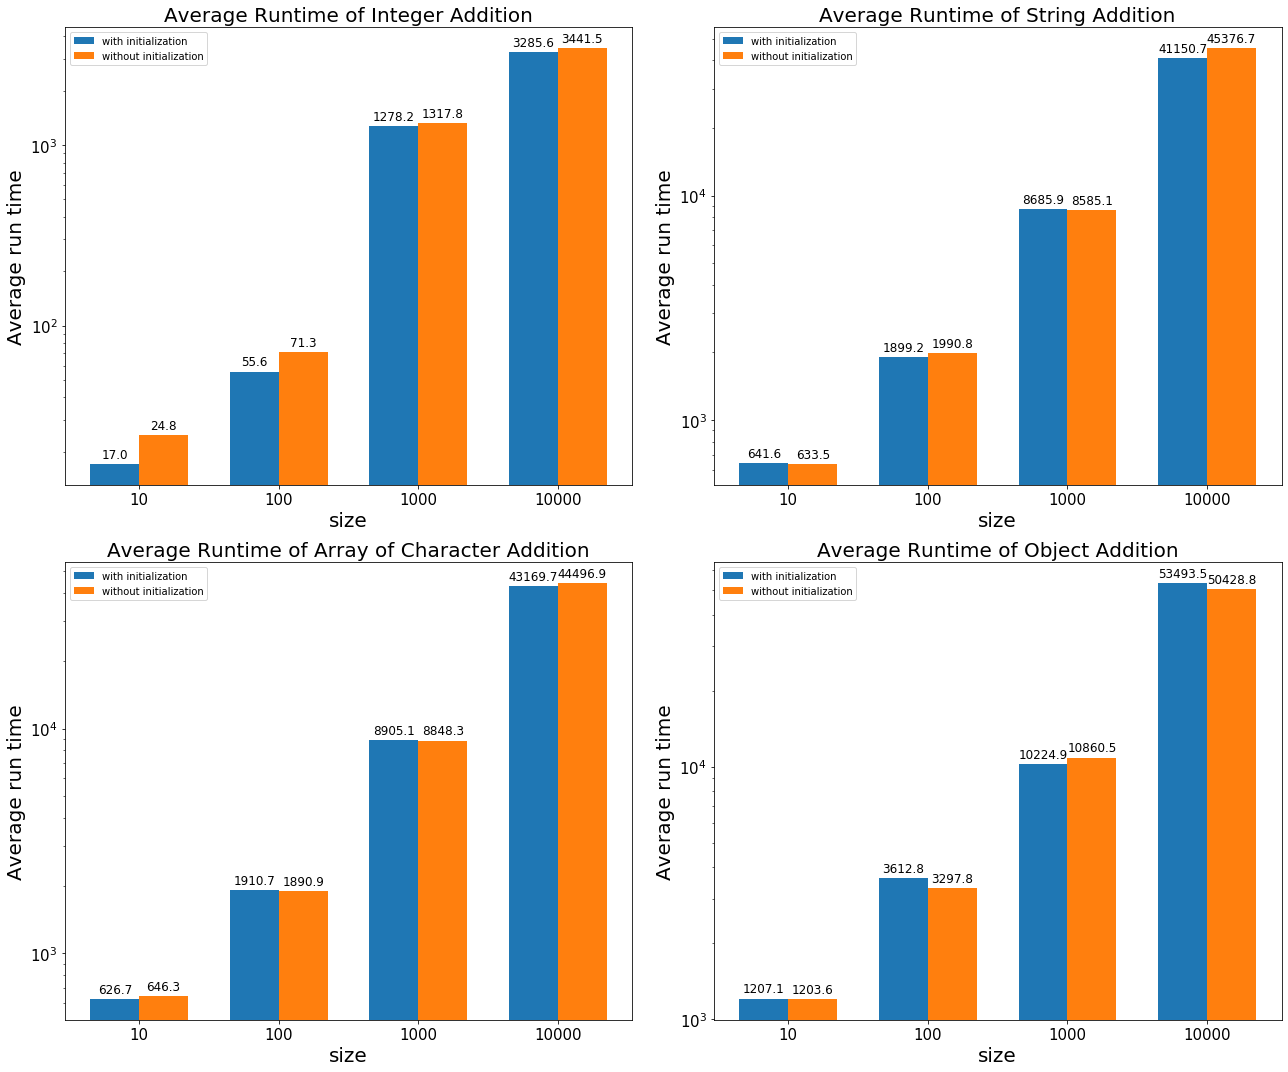

In [40]:
# Barplot taking difference.
width = 0.35 
fig, axs = plt.subplots(figsize = (18, 15), nrows=2, ncols=2)
idx = 0
element = ['Integer', 'String', 'CharArr', 'Object']
for row in range(0,2):
    for col in range(0,2):
        average_withInit = withInit_java[withInit_java['element'] == element[idx]].addtime
        average_withoutInit = withoutInit_java[withoutInit_java['element'] == element[idx]].addtime
        labels = np.array([10, 100, 1000, 10000])
        x = np.arange(len(labels))
        rects1 = axs[row, col].bar(x - width/2, np.round(average_withInit / 1000, 1), width, label='with initialization')

        rects2 = axs[row, col].bar(x + width/2, np.round(average_withoutInit / 1000, 1), width, label='without initialization')
        if element[idx] == "CharArr":
            axs[row, col].set_title("Average Runtime of {} Addition".format('Array of Character'), fontsize = 20)
        else :
            axs[row, col].set_title("Average Runtime of {} Addition".format(element[idx]), fontsize = 20)
        axs[row, col].set_xlabel("size", fontsize=20)
        axs[row, col].set_ylabel("Average run time", fontsize=20)
        axs[row, col].set_xticks(x)
        axs[row, col].set_xticklabels(labels, fontsize=15)
        axs[row, col].yaxis.set_tick_params(labelsize=15)
        axs[row, col].set_yscale('log')
        axs[row, col].legend()
        def autolabel(rects):
            """Attach a text label above each bar in *rects*, displaying its height."""
            for rect in rects:
                height = rect.get_height()
                axs[row, col].annotate('{}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize = 12)
        autolabel(rects1)
        autolabel(rects2)
        idx += 1
fig.tight_layout()
fig.savefig("java_arraylist_log.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


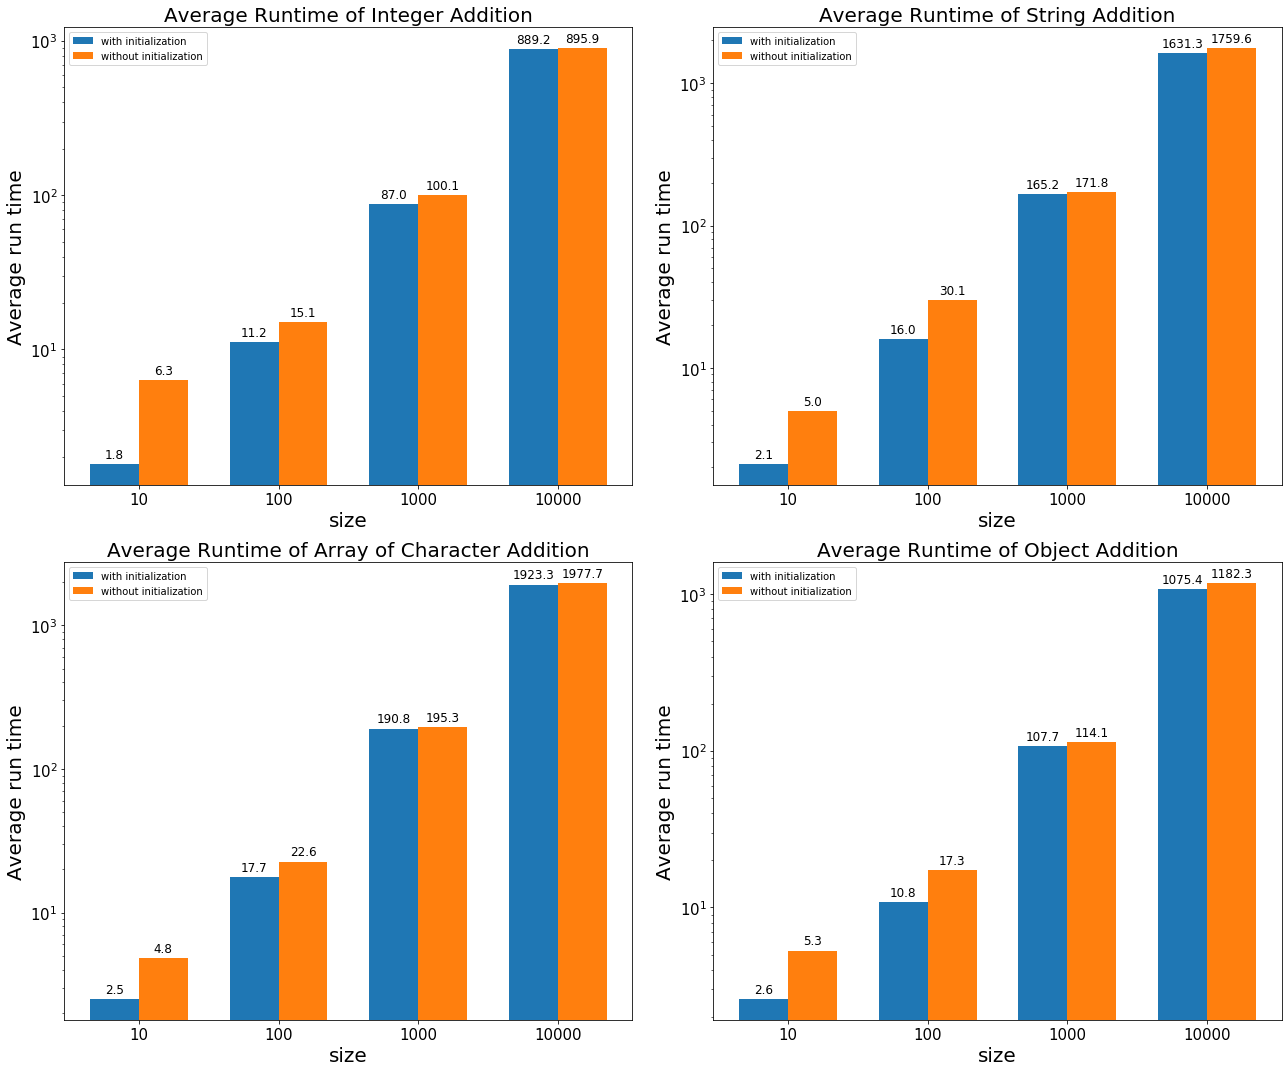

In [41]:
# Barplot taking difference.
width = 0.35 
fig, axs = plt.subplots(figsize = (18, 15), nrows=2, ncols=2)
idx = 0
element = ['Integer', 'String', 'CharArr', 'Object']
for row in range(0,2):
    for col in range(0,2):
        average_withInit = withInit_rust[withInit_java['element'] == element[idx]].addtime
        average_withoutInit = withoutInit_rust[withoutInit_java['element'] == element[idx]].addtime
        labels = np.array([10, 100, 1000, 10000])
        x = np.arange(len(labels))
        rects1 = axs[row, col].bar(x - width/2, np.round(average_withInit / 1000, 1), width, label='with initialization')

        rects2 = axs[row, col].bar(x + width/2, np.round(average_withoutInit / 1000, 1), width, label='without initialization')
        if element[idx] == "CharArr":
            axs[row, col].set_title("Average Runtime of {} Addition".format('Array of Character'), fontsize = 20)
        else :
            axs[row, col].set_title("Average Runtime of {} Addition".format(element[idx]), fontsize = 20)
        axs[row, col].set_xlabel("size", fontsize=20)
        axs[row, col].set_ylabel("Average run time", fontsize=20)
        axs[row, col].set_xticks(x)
        axs[row, col].set_xticklabels(labels, fontsize=15)
        axs[row, col].yaxis.set_tick_params(labelsize=15)
        axs[row, col].set_yscale('log')
        axs[row, col].legend()
        def autolabel(rects):
            """Attach a text label above each bar in *rects*, displaying its height."""
            for rect in rects:
                height = rect.get_height()
                axs[row, col].annotate('{}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize = 12)
        autolabel(rects1)
        autolabel(rects2)
        idx += 1
fig.tight_layout()
fig.savefig("rust_vector_log.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


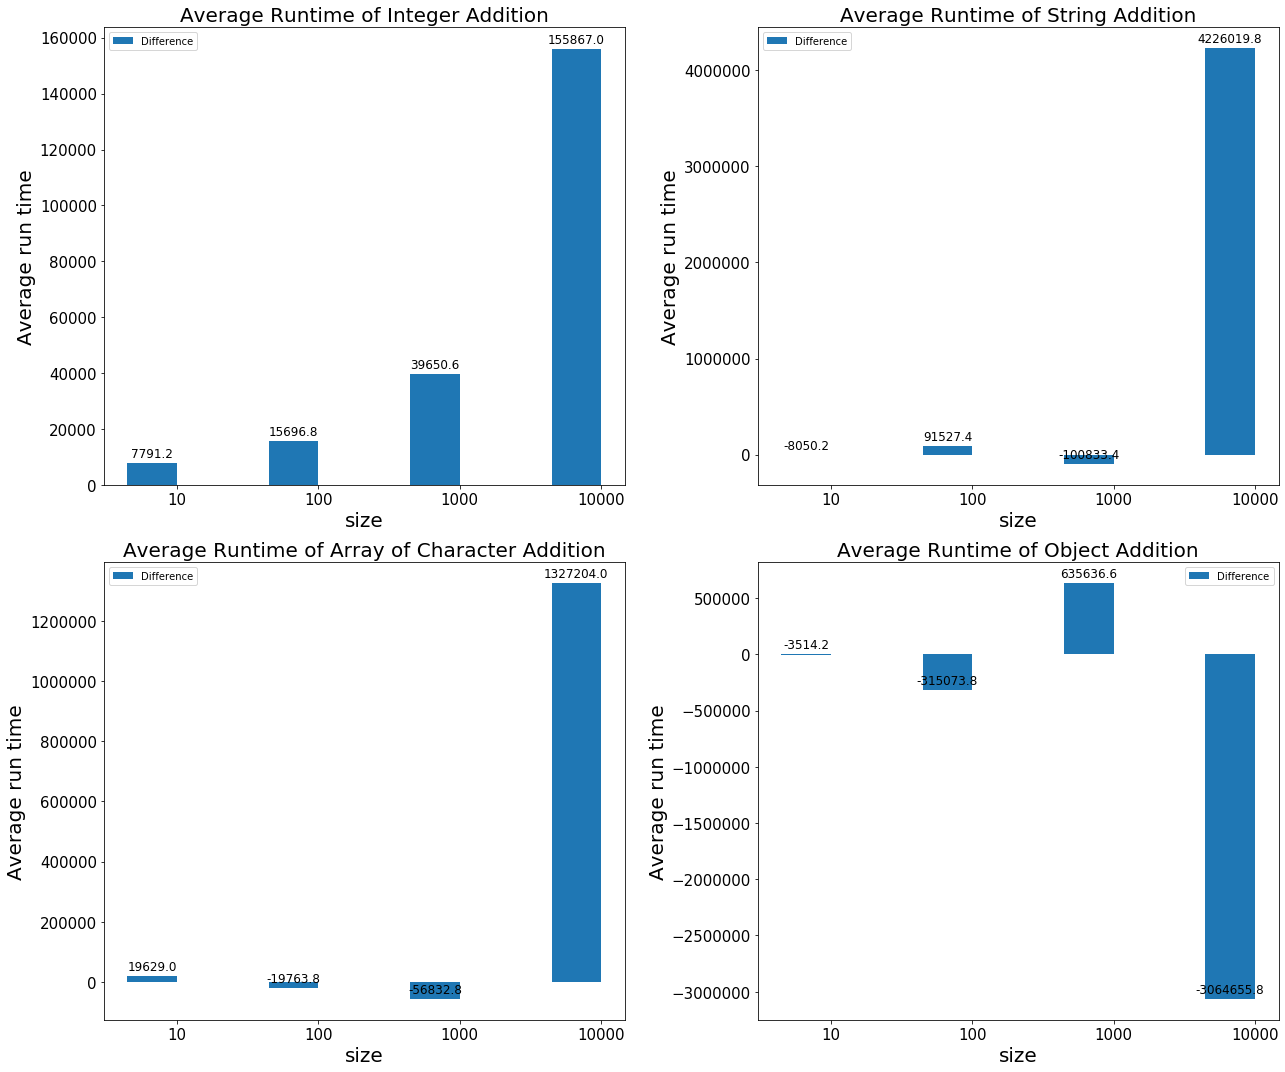

In [46]:
# Barplot taking difference.
width = 0.35 
fig, axs = plt.subplots(figsize = (18, 15), nrows=2, ncols=2)
idx = 0
element = ['Integer', 'String', 'CharArr', 'Object']
for row in range(0,2):
    for col in range(0,2):
        average_withInit = withInit_java[withInit_java['element'] == element[idx]].addtime
        average_withoutInit = withoutInit_java[withoutInit_java['element'] == element[idx]].addtime
        labels = np.array([10, 100, 1000, 10000])
        x = np.arange(len(labels))
        rects1 = axs[row, col].bar(x - width / 2, np.round((average_withoutInit - average_withInit), 1), width, label='Difference')

        if element[idx] == "CharArr":
            axs[row, col].set_title("Average Runtime of {} Addition".format('Array of Character'), fontsize = 20)
        else :
            axs[row, col].set_title("Average Runtime of {} Addition".format(element[idx]), fontsize = 20)
        axs[row, col].set_xlabel("size", fontsize=20)
        axs[row, col].set_ylabel("Average run time", fontsize=20)
        axs[row, col].set_xticks(x)
        axs[row, col].set_xticklabels(labels, fontsize=15)
        axs[row, col].yaxis.set_tick_params(labelsize=15)
        axs[row, col].legend()
        def autolabel(rects):
            """Attach a text label above each bar in *rects*, displaying its height."""
            for rect in rects:
                height = rect.get_height()
                axs[row, col].annotate('{}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize = 12)
        autolabel(rects1)
        idx += 1
fig.tight_layout()
fig.savefig("java_arraylist_difference.eps")
plt.show()